In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import ast  # To safely evaluate the string representation of tuples
import numpy as np 
import os
from scipy.stats import linregress

US EPA Calculation

In [2]:
csv_file_path = os.path.join("..", "output", "data", "csv", "sample", "number_of_thawed_frozen_trans_day_per_year.csv")

df = pd.read_csv(csv_file_path, header=0, names=['Grid', 'Year', 'Frozen', 'Thawed', 'Transition_0', 'Transition_1'])
df['Transition'] = df.Transition_0 + df.Transition_1
df.drop(columns=['Transition_0', 'Transition_1'], inplace=True)
# df['Sum']  = df['Frozen'] + df['Thawed'] + df['Transition']

#################### CO
# 0 = AM/PM frozen
# 1 = AM/PM thawed
# 2 = AM frozen, PM thawed (transitional)
# 3 = AM thawed, PM frozen (inverse transitional)






long_lat= pd.read_csv(os.path.join("..", "output", "data", "csv", "sample", "selected_data.csv"))

df2 = long_lat.loc[:,['longitude', 'latitude', 'original_indices', 'landcover']]
df2.rename(columns={'original_indices':'Grid'}, inplace=True)
# df2.set_index('original_indices', inplace=True)


main = pd.merge(df, df2, on='Grid', how='outer')



In [3]:
main

,Grid,Year,Frozen,Thawed,Transition,longitude,latitude,landcover
0,"(10, 212)",NaN,NaN,NaN,NaN,-124.6850,74.2766,0
1,"(10, 213)",NaN,NaN,NaN,NaN,-124.4250,74.2766,11
2,"(10, 214)",NaN,NaN,NaN,NaN,-124.1650,74.2766,11
3,"(10, 215)",NaN,NaN,NaN,NaN,-123.9050,74.2766,18
4,"(10, 216)",1979.0,267.0,72.0,26.0,-123.6440,74.2766,11
...,...,...,...,...,...,...,...,...
533266,"(96, 376)",NaN,NaN,NaN,NaN,-81.9957,42.0322,18
533267,"(96, 377)",NaN,NaN,NaN,NaN,-81.7354,42.0322,18
533268,"(97, 373)",NaN,NaN,NaN,NaN,-82.7766,41.7699,18
533269,"(97, 374)",NaN,NaN,NaN,NaN,-82.5163,41.7699,18


-0.1662196456518414


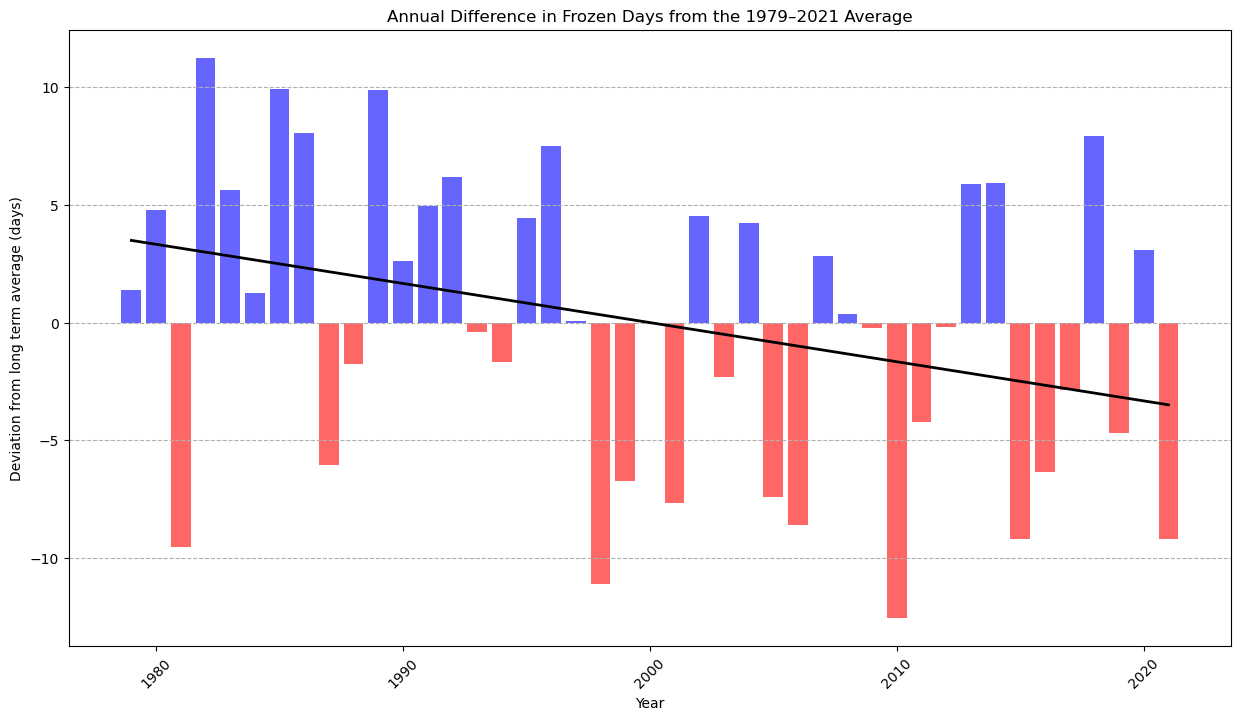

'\nThis figure shows the number of days the ground is considered unfrozen/frozen in the Canada compared with the 1979–2021 average.\nFor each year, the bar represents the number of days shorter or longer than average.\nPositive numbers represent years with more unfrozen/frozen days than average.\nChoosing a different long-term average for comparison would not change the shape of the data over time.\n'

In [4]:
# Assuming df is DataFrame

# Step 1: Calculate the Annual Sum of 'Frozen'
annual_mean_days = df.groupby('Year')['Frozen'].mean()

# Step 2: Calculate the 1979-2021 Average
long_term_average_days = annual_mean_days.mean()

# Step 3: Calculate Difference from Average
difference_from_average = annual_mean_days - long_term_average_days


# Calculate Linear Regression for Trend Line
# Converting index to a suitable format for linregress, assuming index is year and is numeric
x = difference_from_average.index.astype(int)  # Years
y = difference_from_average.values  # Difference from average

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(x, y)

print(slope)
# Calculate the values of the trend line
trend_line = intercept + slope * x

# Generate values for the trend line
x_line = np.linspace(x.min(), x.max(), 100)  # Generating a smooth line
y_line = intercept + slope * x_line




# Step 4: Plot
plt.figure(figsize=(15, 8))  # Adjusts the size of the figure
# difference_from_average.plot(kind='bar', color=difference_from_average.apply(lambda x: 'r' if x > 0 else 'b'))
# plt.axhline(0, color='black', linewidth=0.8)  # Adds a line at y=0 for reference

# Bar chart
plt.bar(x, y, label='Difference from Average', alpha=0.6, color=difference_from_average.apply(lambda x: 'b' if x > 0 else 'r'))

# Trend line
plt.plot(x_line, y_line, color='black', linewidth=2, label='Trend Line')


plt.title('Annual Difference in Frozen Days from the 1979–2021 Average')
plt.xlabel('Year')
plt.ylabel('Deviation from long term average (days)')
plt.xticks(rotation=45)  # Rotates the x-axis labels for better readability
plt.grid(axis='y', linestyle='--')  # Adds a grid for the y-axis
plt.savefig('Annual_Difference_in_Frozen_Days_from_the_1979_2021_Average.png')
plt.savefig('Annual_Difference_in_Frozen_Days_from_the_1979_2021_Average.pdf')
plt.show()


'''
This figure shows the number of days the ground is considered unfrozen/frozen in the Canada compared with the 1979–2021 average.
For each year, the bar represents the number of days shorter or longer than average.
Positive numbers represent years with more unfrozen/frozen days than average.
Choosing a different long-term average for comparison would not change the shape of the data over time.
'''

Annual Analysis

In [74]:
csv_file_path = r"./../output/data/csv/sample/status_counts_per_month_year.csv"
df = pd.read_csv(csv_file_path)

In [75]:
#################### CO
# 0 = AM/PM frozen
# 1 = AM/PM thawed
# 2 = AM frozen, PM thawed (transitional)
# 3 = AM thawed, PM frozen (inverse transitional)

df['Frozen'] = df.Status_0_Count
df['Thawed'] = df.Status_1_Count
df['Transition'] = df.Status_2_Count + df.Status_3_Count

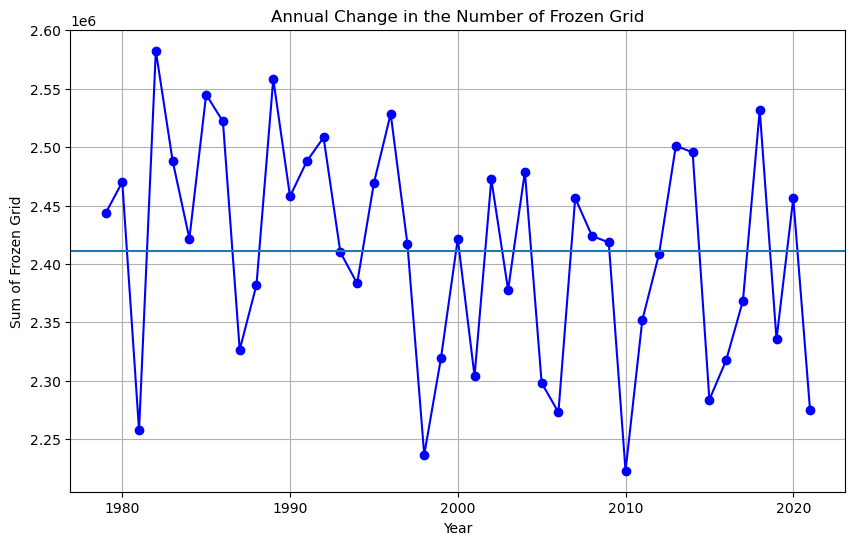

In [85]:
# Group by 'Year' and calculate the sum of 'Status_0_Count'
annual_sum = df.groupby('Year')['Frozen'].sum()

# Plotting
plt.figure(figsize=(10, 6))  # Optional: Specifies the figure size
plt.plot(annual_sum.index, annual_sum.values, marker='o', linestyle='-', color='b')
plt.axhline(y= df.groupby('Year')['Frozen'].sum().mean())
plt.title('Annual Change in the Number of Frozen Grid')
plt.xlabel('Year')
plt.ylabel('Sum of Frozen Grid')
plt.grid(True)  # Optional: Adds a grid
plt.show()





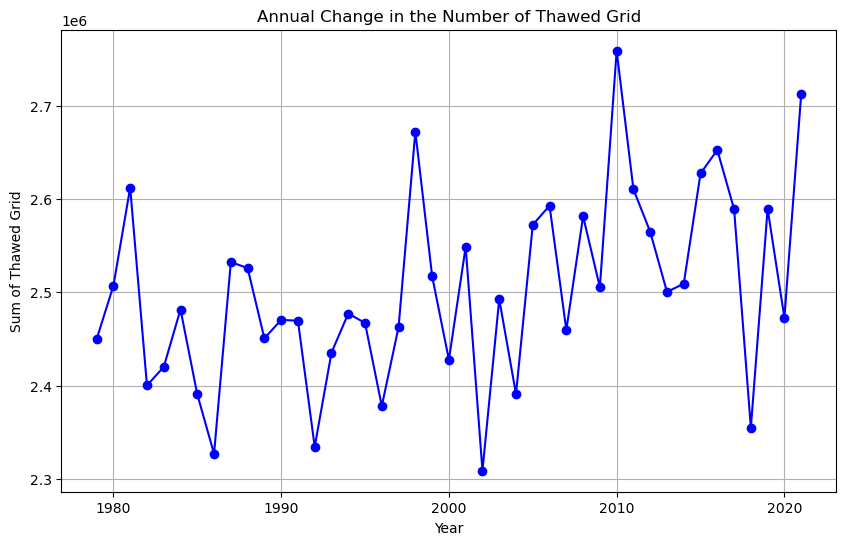

In [82]:
# Group by 'Year' and calculate the sum of 'Status_0_Count'
annual_sum = df.groupby('Year')['Thawed'].sum()

# Plotting
plt.figure(figsize=(10, 6))  # Optional: Specifies the figure size
plt.plot(annual_sum.index, annual_sum.values, marker='o', linestyle='-', color='b')
plt.title('Annual Change in the Number of Thawed Grid')
plt.xlabel('Year')
plt.ylabel('Sum of Thawed Grid')
plt.grid(True)  # Optional: Adds a grid
plt.show()

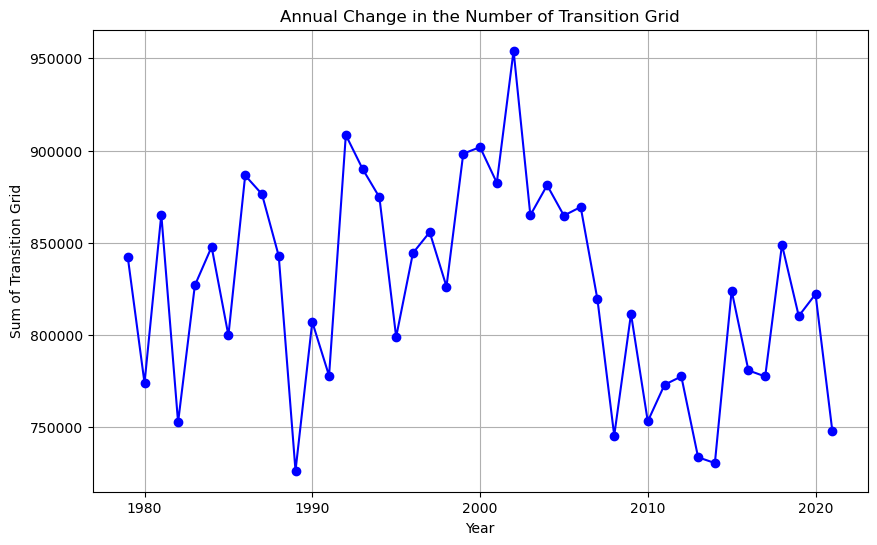

In [83]:
# Group by 'Year' and calculate the sum of 'Status_0_Count'
annual_sum = df.groupby('Year')['Transition'].sum()

# Plotting
plt.figure(figsize=(10, 6))  # Optional: Specifies the figure size
plt.plot(annual_sum.index, annual_sum.values, marker='o', linestyle='-', color='b')
plt.title('Annual Change in the Number of Transition Grid')
plt.xlabel('Year')
plt.ylabel('Sum of Transition Grid')
plt.grid(True)  # Optional: Adds a grid
plt.show()

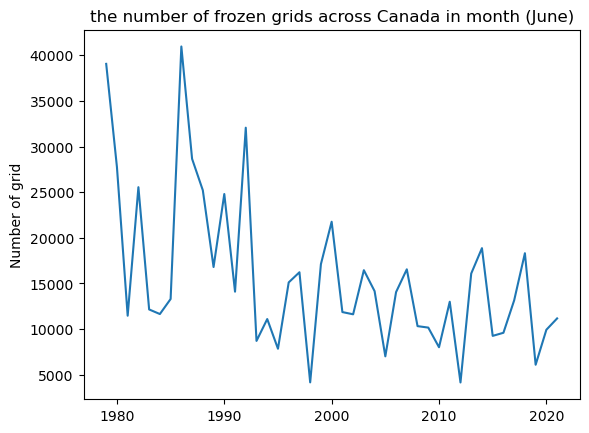

In [68]:
month = df[df.Month == 6] 

plt.plot(month.Year, month.Status_0_Count)

plt.ylabel('Number of grid')
plt.title('the number of frozen grids across Canada in month (June)')
plt.show()

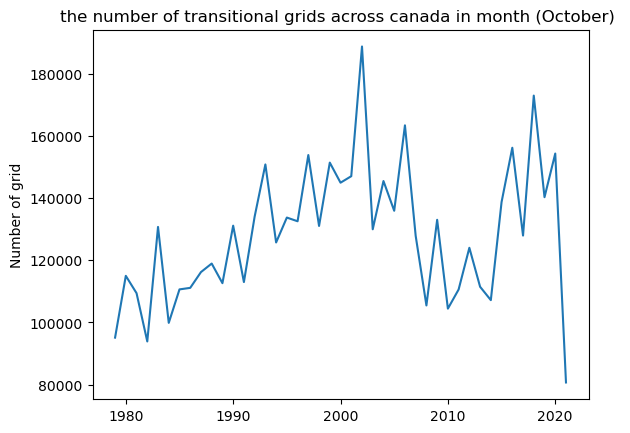

In [60]:
month = df[df.Month == 10] 

# plt.plot(month.Year, month.Status_0_Count)
plt.plot(month.Year, month.transition)
# plt.plot(month.Year, month.transition)
plt.ylabel('Number of grid')
plt.title('the number of transitional grids across canada in month (October) ')
plt.show()

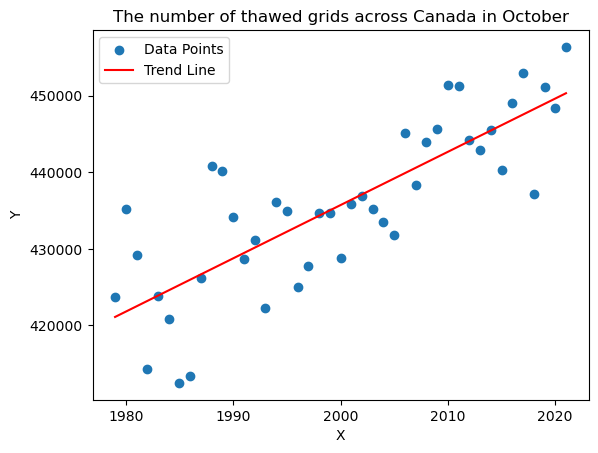

In [72]:
month = df[df.Month == 8] 

x = month.Year
y = month.Status_1_Count

# Fit a linear trend line
coefficients = np.polyfit(x, y, 1)
trendline = np.poly1d(coefficients)

# Plot the scatter plot
plt.scatter(x, y, label='Data Points')

# Plot the trend line
plt.plot(x, trendline(x), color='red', label='Trend Line')

# Add labels and legend
plt.xlabel('X')
plt.ylabel('Y')
plt.title('The number of thawed grids across Canada in October')
plt.legend()

# Show the plot

In [ ]:
############################F/T status indicated as follows:###########################

#################### AM, PM
# 0 = frozen
# 1 = thawed

#################### CO
# 0 = AM/PM frozen
# 1 = AM/PM thawed
# 2 = AM frozen, PM thawed (transitional)
# 3 = AM thawed, PM frozen (inverse transitional)

############## Additional Values
# 252 = no data
# 253 = non-cold constraint area
# 254 = 100% open water
# 255 = fill

In [89]:
# Values to exclude
values_to_exclude = [252, 253, 254, 255]

# Select rows where 'ft_status' is not in the list of values to exclude
filtered_df = df[~df['ft_status'].isin(values_to_exclude)]

In [7]:
# Creating a composite month-year column for clearer grouping (optional)
df['month_year'] = df['datetime'].dt.to_period('M')

# Step 3: Use pd.crosstab to count occurrences of each status value for each month-year
status_counts_per_month_year = pd.crosstab(index=df['month_year'], columns=df['ft_status'])

# Optional: Filter columns in the crosstab to only include status values of 0, 1, 2, and 3
status_counts_per_month_year = status_counts_per_month_year[[0,1,2,3]]

# status_counts_per_month_year now has the count of each status value (0, 1, 2, 3) for each month-year combination


In [8]:
status_counts_per_month_year

ft_status,0,1,2,3
month_year,,,,
1979-01,453078,12252,12218,9555
1979-02,423808,4724,7465,3967
1979-03,393090,18416,67410,8187
1979-04,263884,69950,130908,6648
1979-05,113543,255048,112829,5683
1979-06,39050,383152,45120,4068
1979-07,3749,459759,18491,5104
1979-08,21495,423752,33268,8588
1979-09,49675,365803,47940,7972


In [118]:
status_counts_per_month_year['transition'] = status_counts_per_month_year[2] + status_counts_per_month_year[3]
date_index = status_counts_per_month_year.index.to_timestamp()

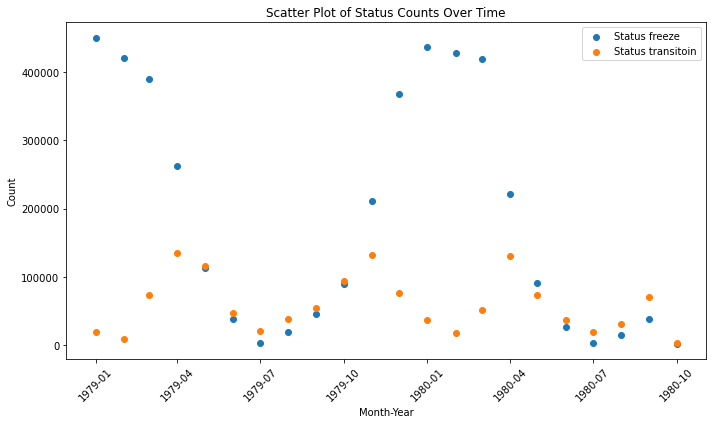

In [120]:
plt.figure(figsize=(10, 6))  # Create a new figure for each plot
# Use date_index for the x-axis and the status column for the y-axis
plt.scatter(date_index, status_counts_per_month_year[0], label='Status freeze')
plt.scatter(date_index, status_counts_per_month_year['transition'], label='Status transitoin')

plt.title('Scatter Plot of Status Counts Over Time')
plt.xlabel('Month-Year')
plt.ylabel('Count')
plt.legend()
# Formatting the x-axis labels to show them as dates and rotate for better readability
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust subplot params
plt.show()

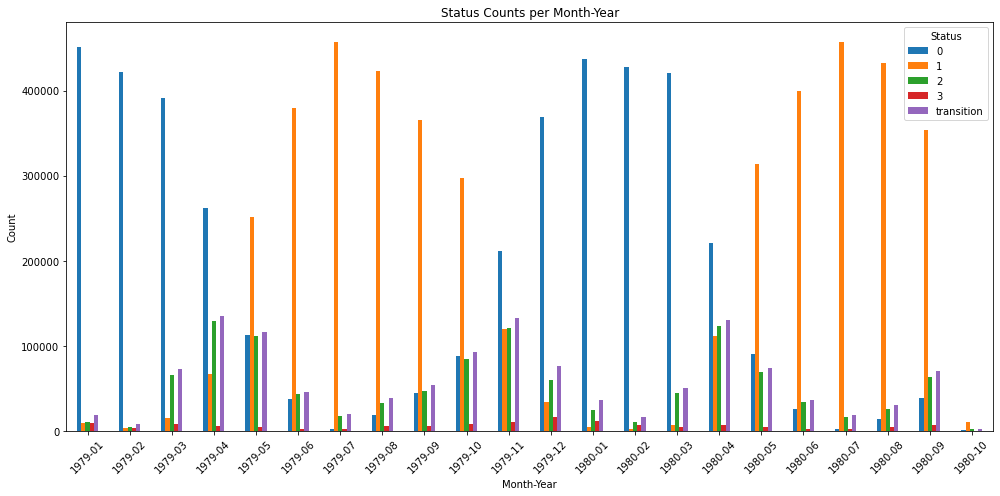

In [117]:
import matplotlib.pyplot as plt

# Assuming status_counts_per_month_year is your DataFrame from the previous steps
# It contains counts of each status (0, 1, 2, 3) for each month-year combination

# Plotting the DataFrame
status_counts_per_month_year.plot(kind='bar', figsize=(14, 7))
plt.title('Status Counts per Month-Year')
plt.xlabel('Month-Year')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.legend(title='Status')
plt.tight_layout()  # Adjusts subplot params so that the subplot(s) fits in to the figure area

# Show the plot
plt.show()
